### Data Preprocessing

Reading the data

In [ ]:
import pandas as pd
ibm = pd.read_csv("daily_IBM.csv")
print(ibm.head())

    timestamp    open      high      low   close    volume
0  2022-01-28  133.19  134.5300  131.790  134.50   5471497
1  2022-01-27  133.66  134.7500  132.080  132.52   5499566
2  2022-01-26  136.47  137.0700  133.130  134.26   8335992
3  2022-01-25  129.14  137.3361  128.300  136.10  19715698
4  2022-01-24  127.99  129.1500  124.193  128.82  13777648


Manipulating the Data

In [ ]:
ibm.fillna(0,inplace=True)

ibm.drop(['open','high','low','volume'],axis=1,inplace=True)

ibm


,timestamp,close
0,2022-01-28,134.50
1,2022-01-27,132.52
2,2022-01-26,134.26
3,2022-01-25,136.10
4,2022-01-24,128.82
...,...,...
5593,1999-11-05,90.25
5594,1999-11-04,91.56
5595,1999-11-03,94.37
5596,1999-11-02,94.81


In [ ]:
ibm.index = pd.to_datetime(ibm['timestamp'], format='%Y-%m-%d')
ibm_mod = ibm.drop(['timestamp'],axis=1,inplace=False)
ibm_mod

,close
timestamp,
2022-01-28,134.50
2022-01-27,132.52
2022-01-26,134.26
2022-01-25,136.10
2022-01-24,128.82
...,...
1999-11-05,90.25
1999-11-04,91.56
1999-11-03,94.37


### Data Visualizing

A few graphs below showcase what our data looks like

In [ ]:
#@title
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (9, 5)

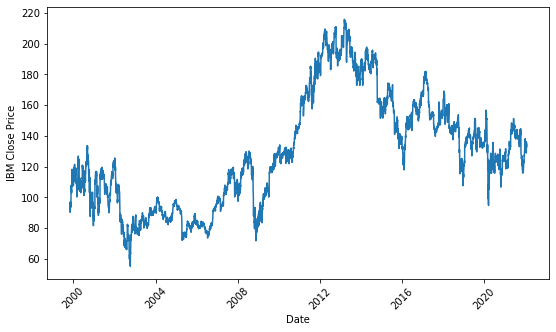

In [ ]:
#@title
plt.ylabel('IBM Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.plot(ibm_mod.index, ibm_mod['close'], );

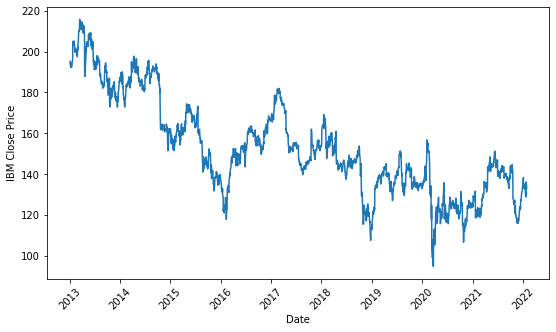

In [ ]:
truncated = ibm_mod[ibm_mod.index > pd.to_datetime("2013-01-02", format='%Y-%m-%d')]

plt.ylabel('IBM Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.plot(truncated.index, truncated['close'], )

### Splitting DataSet in Training and Test sets

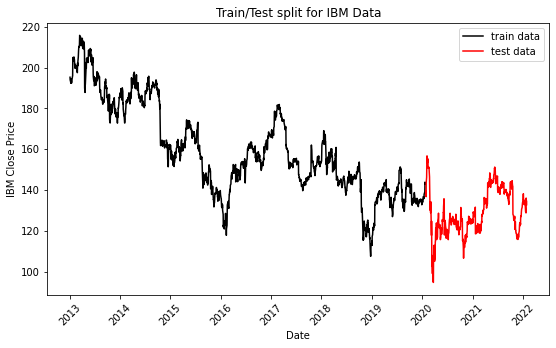

In [ ]:
train = truncated[truncated.index < pd.to_datetime("2020-01-24", format='%Y-%m-%d')]
test = truncated[truncated.index > pd.to_datetime("2020-01-24", format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")

plt.ylabel('IBM Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.title("Train/Test split for IBM Data")
plt.legend(['train data','test data'])

### Training the Model 


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['close']

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
training_data = train['close'].values
test_data = test['close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

Making predictions

In [ ]:
print(model_predictions)

[array([195.27540765]), array([134.85300045]), array([134.40600084]), array([133.55147886]), array([137.9442154]), array([128.66946873]), array([129.6050535]), array([130.85083478]), array([131.37127538]), array([132.92683585]), array([134.19927401]), array([134.73316542]), array([133.58773508]), array([132.92276189]), array([135.07329226]), array([134.73231377]), array([135.32705764]), array([138.26224958]), array([137.92060542]), array([136.0399827]), array([133.76373213]), array([133.98158166]), array([133.29555135]), array([132.5882252]), array([131.63651283]), array([130.63835281]), array([129.75461277]), array([128.96494924]), array([127.04319673]), array([127.43584933]), array([125.88535445]), array([123.08505741]), array([123.84999409]), array([122.50945545]), array([124.06574135]), array([123.52365455]), array([122.99603521]), array([121.60887959]), array([119.92021168]), array([118.85994184]), array([116.87447632]), array([116.92951851]), array([117.06402351]), array([118.449

In [ ]:
y_pred_df = test.copy()

y_pred_df['Predictions'] = model_predictions
#y_pred_df.drop(['close'],axis=1,inplace=True)

y_pred_df

,close,Predictions
timestamp,,
2022-01-28,134.50,[195.2754076545199]
2022-01-27,132.52,[134.85300044792874]
2022-01-26,134.26,[134.40600083506013]
2022-01-25,136.10,[133.55147886272576]
2022-01-24,128.82,[137.94421540188145]
...,...,...
2020-01-31,143.73,[146.46062150853083]
2020-01-30,136.77,[143.86331853091127]
2020-01-29,137.69,[136.88114009678463]


In [ ]:
y_pred_df.drop(['close'],axis=1,inplace=True)

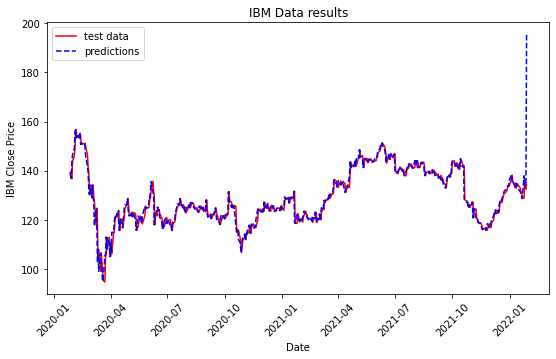

In [ ]:
plt.plot(test, color = "red")
plt.plot(y_pred_df, color = "blue", ls = '--')

plt.ylabel('IBM Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)

plt.title("IBM Data results")
plt.legend(['test data','predictions'])

### Using LSTM approach

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
raw = pd.read_csv('daily_IBM.csv').loc[::-1].reset_index(drop=True)
raw.shape

(5598, 6)

In [ ]:
raw.head()

,timestamp,open,high,low,close,volume
0,1999-11-01,98.50,98.81,96.37,96.75,9551800
1,1999-11-02,96.75,96.81,93.69,94.81,11105400
2,1999-11-03,95.87,95.94,93.50,94.37,10369100
3,1999-11-04,94.44,94.44,90.00,91.56,16697600
4,1999-11-05,92.75,92.94,90.19,90.25,13737600


In [ ]:
raw['timestamp']

0       1999-11-01
1       1999-11-02
2       1999-11-03
3       1999-11-04
4       1999-11-05
           ...    
5593    2022-01-24
5594    2022-01-25
5595    2022-01-26
5596    2022-01-27
5597    2022-01-28
Name: timestamp, Length: 5598, dtype: object

In [ ]:
close = raw['close'].copy()

In [ ]:
training_set = (close.iloc[:5000]).to_numpy().reshape(-1,1)
test_set = (close.iloc[5000:]).to_numpy().reshape(-1,1)

In [ ]:
# Feature Scaling
sc = StandardScaler()
sc.fit(training_set)
training_set_scaled = sc.transform(training_set)

In [ ]:
# Creating a data structure with 14 time-steps and 1 output
X_train = []
y_train = []
for i in range(14, 5000):
    X_train.append(training_set_scaled[i-14:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

In [ ]:
X_train.shape, y_tra

(4986, 14, 1)

In [ ]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
156/156 [==============================] - 12s 33ms/step - loss: 0.0793
Epoch 2/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0290
Epoch 3/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0270
Epoch 4/100
156/156 [==============================] - 5s 34ms/step - loss: 0.0246
Epoch 5/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0251
Epoch 6/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0223
Epoch 7/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0222
Epoch 8/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0185
Epoch 9/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0176
Epoch 10/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0183
Epoch 11/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0173
Epoch 12/100
156/156 [==============================] - 5s 33ms/step - loss: 0.0160


In [ ]:
# Preparing test data
inputs = close[5000 - 14:].to_numpy().reshape(-1,1)

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [ ]:
inputs.shape

(612, 1)

In [ ]:
X_test = []
for i in range(14, 612):
    X_test.append(inputs[i-14:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
X_test.shape

(598, 14, 1)

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

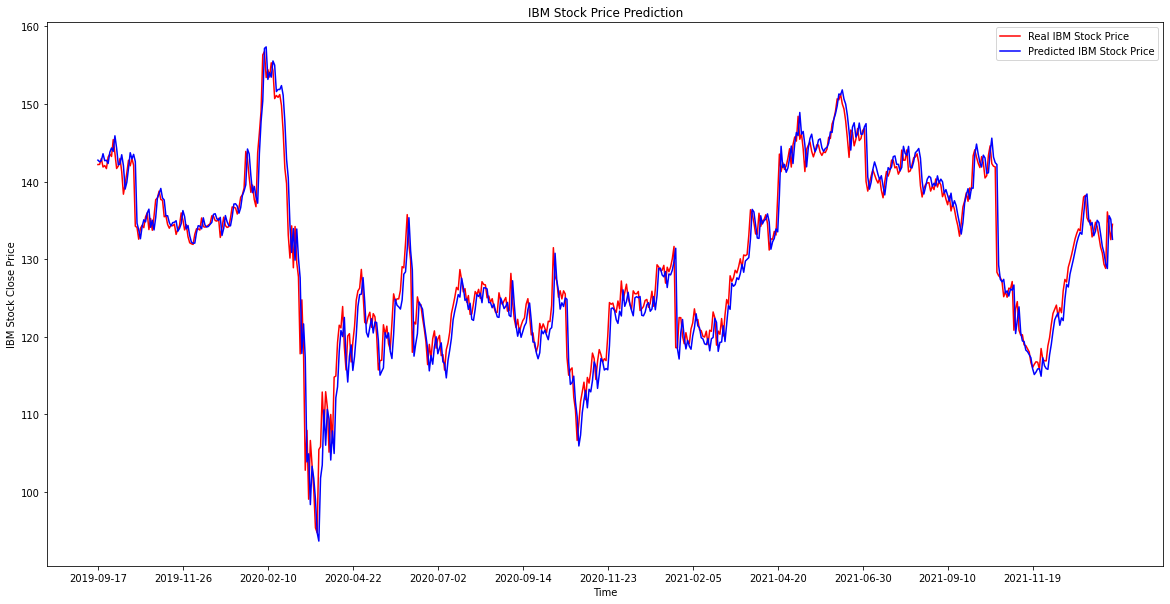

In [ ]:
# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(raw.loc[5000:,"timestamp"], test_set, 'r', label = 'Real IBM Stock Price')
plt.plot(raw.loc[5000:,"timestamp"], predicted_stock_price, 'b', label = 'Predicted IBM Stock Price')
plt.xticks(np.arange(0,598,50))
plt.title('IBM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('IBM Stock Close Price')
plt.legend()
plt.show()

In [ ]:
raw.iloc[3500]

timestamp    2013-10-01
open             185.34
high             186.65
low              184.65
close            186.38
volume          2681200
Name: 3500, dtype: object

## Trying prediction for an arbitrary date

In [ ]:
def prep_input(input_date):
  idx = raw[raw['timestamp']==input_date].index.values[0]

  input = sc.transform(raw.loc[idx-13:idx,'close'].to_numpy().reshape(14,1))

  return input.reshape(1,14,1)

In [ ]:
predicted_stock_price = model.predict(prep_input('2013-10-01'))
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[187.11333]], dtype=float32)

In [ ]:
raw.iloc[3501]

timestamp    2013-10-02
open             185.54
high             186.31
low              184.41
close            184.96
volume          3617100
Name: 3501, dtype: object